In [ ]:
import numpy as np
import random as rm
import timeit as tt
import statistics as st
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp

**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Number of multiplications = n.m.k\
Number of additions = n.m.(k-1)\
Every element in the resultant matrix is the dot product of row and column vector of length k. For which the number of multipcations is k and additions is (k-1). Therefore the total is this count times n.m. 

**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [ ]:
n = 8
k = 10
m = 6

# initializing matrices a and b
a = []
for i in range(n):
  col = []
  for j in range(k):
    col.append(rm.randint(1,9))
  a.append(col)

b = []
for i in range(k):
  col = []
  for j in range(m):
    col.append(rm.randint(1,9))
  b.append(col)

# matrix to store the result 
c = []
for i in range(n):
  col = []
  for j in range(m):
    col.append(0)
  c.append(col)

time1 = []
time2 = []

# list method
def f1(a,b,c):
  for i in range (len(a)):
    for j in range (len(b[0])):
      for p in range (len(a[0])):
        c[i][j] += a[i][p]*b[p][j]
  return c

# numpy method
def f2(a,b):
  return np.dot(a,b)

print("a = ", a)
print("b =", b)
print("res1 = ", f1(a,b,c))
print("res2 = ", f2(a,b))

for count in range(1000):
  
  for i in range(n):
    for j in range(m):
      c[i][j] = 0

  t0 = tt.default_timer()
  res1 = f1(a,b,c)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time1.append(time)


  t0 = tt.default_timer() 
  res2 = f2(a,b)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time2.append(time)

# average times
ti1 = sum(time1)/len(time1)
ti2 = sum(time2)/len(time2)
ti1 = round(ti1,3)
ti2 = round(ti2,3)

# sd's
sd1 = st.pstdev(time1)
sd2 = st.pstdev(time2)
sd1 = round(sd1,3)
sd2 = round(sd2,3)

print("list method: ", ti1,"+/-", sd1, " micro sec")
print("numpy method: ", ti2,"+/-", sd2, " micro sec")


a =  [[4, 7, 6, 1, 1, 7, 4, 3, 1, 3], [3, 6, 7, 4, 9, 3, 5, 7, 3, 2], [4, 7, 6, 2, 2, 5, 7, 8, 3, 4], [8, 1, 7, 2, 8, 7, 9, 9, 6, 3], [6, 6, 2, 2, 2, 8, 8, 7, 9, 7], [7, 8, 9, 1, 2, 2, 1, 5, 8, 2], [2, 4, 4, 6, 2, 2, 3, 3, 3, 8], [4, 7, 3, 3, 9, 6, 9, 5, 1, 6]]
b = [[4, 4, 8, 3, 8, 4], [9, 3, 1, 7, 6, 7], [6, 8, 4, 1, 4, 6], [4, 6, 8, 6, 4, 7], [6, 4, 8, 2, 1, 6], [6, 8, 2, 2, 1, 5], [6, 5, 4, 2, 6, 9], [3, 5, 2, 8, 8, 2], [4, 9, 4, 1, 4, 1], [7, 4, 2, 4, 6, 2]]
res1 =  [[225, 207, 125, 134, 180, 198], [273, 265, 218, 183, 226, 259], [271, 263, 169, 190, 255, 242], [307, 347, 271, 188, 289, 289], [312, 326, 206, 203, 292, 253], [249, 264, 178, 158, 238, 198], [211, 201, 150, 147, 186, 176], [314, 266, 221, 195, 247, 292]]
res2 =  [[225 207 125 134 180 198]
 [273 265 218 183 226 259]
 [271 263 169 190 255 242]
 [307 347 271 188 289 289]
 [312 326 206 203 292 253]
 [249 264 178 158 238 198]
 [211 201 150 147 186 176]
 [314 266 221 195 247 292]]
list method:  121.348 +/- 20.311  micro sec

Using numpy is faster because it can do the calculations in a parallel manner. Also most of the numpy library is written in C or C++ which makes it faster.

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

If the size of the array is n, then the time complexity of finding the median of the array will be O($n$^($\lceil$$n$/2$\rceil$)).\
A better method would be to sort the array in O($n$$log(n)$) time and then finding the middle element in O(1) time.

In [ ]:
# assume odd length array
num = []
nu = 501
for h in range(nu):
  num.append(rm.randint(1,101))
copy = num.copy()
iter = nu//2

# ceil(n/2) passes
def f3(num):
  for r in range(iter):
    max = num[0]
    for t in range(1,len(num)):
      if num[t] > max:
        max = num[t]
    num.remove(max)
  max = num[0]
  for t in range(1,len(num)):
    if num[t] > max:
      max = num[t]
  return max

# sorting method
def f4():
  num.sort()
  return num[iter]

# numpy.median method
def f5():
  return np.median(num)
  
print(f3(copy))
print(f4())
print(int(f5()))

time3 = []
time4 = []
time5 = []
# time calculation
for count in range(1000):
  copy = num.copy()

  t0 = tt.default_timer()
  r3 = f3(copy)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time3.append(time)


  t0 = tt.default_timer() 
  r4 = f4()
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time4.append(time)

  t0 = tt.default_timer() 
  r5 = f5()
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time5.append(time)

# average times
ti3 = sum(time3)/len(time3)
ti4 = sum(time4)/len(time4)
ti5 = sum(time5)/len(time5)
ti3 = round(ti3,3)
ti4 = round(ti4,3)
ti5 = round(ti5,3)
# sd's
sd3 = st.pstdev(time3)
sd4 = st.pstdev(time4)
sd5 = st.pstdev(time5)
sd3 = round(sd3,3)
sd4 = round(sd4,3)
sd5 = round(sd5,3)

print("n//2 pass method: ", ti3,"+/-", sd3, " micro sec")
print("sort method: ", ti4,"+/-", sd4, " micro sec")
print("numpy method: ", ti5,"+/-", sd5, " micro sec")

49
49
49
n//2 pass method:  7988.397 +/- 997.941  micro sec
sort method:  7.119 +/- 3.236  micro sec
numpy method:  171.455 +/- 96.155  micro sec


The order of time complexities is as follows:\
repeated traversing >> numpy.median() > sort().


**4. What is the gradient of the following function with respect to x and y?\
$x^2$$y$ $+$ $y^3$$sin$($x)$**


wrt $x$, the gradient is $2xy$ $+$ $y^3$$cos(x)$\
wrt $y$, the gradient is $x^2$ $+$ $3y^2$$sin(x)$

**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:
def f(x, y):
  return x**2*y + y**3*jnp.sin(x)

# manual derivatives
def fx(x, y):
  return 2*x*y + y**3*jnp.cos(x)
def fy(x, y):
  return x**2 + 3*y**2*jnp.sin(x)


df_dx = grad(f, argnums=0)
df_dy = grad(f, argnums=1)
for i in range(5):
  x = round(rm.uniform(0.0,10.0),2)
  y = round(rm.uniform(0.0,10.0),2)
  print(x,y)
  print("wrt x- JAX: ",float(df_dx(x, y))," manual: ",float(fx(x,y)))
  print("wrt y- JAX: ",float(df_dy(x, y))," manual: ",float(fy(x,y)))

7.5 0.59
wrt x- JAX:  8.921191215515137  manual:  8.921192169189453
wrt y- JAX:  57.22955322265625  manual:  57.22955322265625
7.04 3.06
wrt x- JAX:  63.916019439697266  manual:  63.916019439697266
wrt y- JAX:  68.8489990234375  manual:  68.8489990234375
1.33 0.12
wrt x- JAX:  0.3196120858192444  manual:  0.3196120858192444
wrt y- JAX:  1.8108536005020142  manual:  1.8108536005020142
1.38 2.68
wrt x- JAX:  11.047164916992188  manual:  11.047164916992188
wrt y- JAX:  23.060596466064453  manual:  23.06059455871582
1.9 4.9
wrt x- JAX:  -19.414690017700195  manual:  -19.414690017700195
wrt y- JAX:  71.7719955444336  manual:  71.7719955444336


**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
x, y = smp.symbols('x y', real = True)
f = x**2*y + y**3*smp.sin(x)

dfdx = smp.diff(f, x)
dfdy = smp.diff(f, y)
print(dfdx)
print(dfdy)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


**7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.** 

In [ ]:
college = {}
college[2022] = {'Branch 1':{}, 'Branch 2':{}}
college[2023] = {'Branch 1':{}, 'Branch 2':{}}
college[2024] = {'Branch 1':{}, 'Branch 2':{}}
college[2025] = {'Branch 1':{}, 'Branch 2':{}}
college[2022]['Branch 1'] = {'Roll Number :1':{'Name':'N','Marks':{'Maths':100, 'English':70, 'Science':80}}}
college[2022]['Branch 1']['Roll Number: 2'] = {'Name':'A','Marks':{'Maths':90, 'English':80, 'Science':80}}
college[2024]['Branch 2'] = {'Roll Number :3':{'Name':'P','Marks':{'Maths':80, 'English':70, 'Science':90}}}
college[2025]['Branch 3'] = {}
print(college[2024])

{'Branch 1': {}, 'Branch 2': {'Roll Number :3': {'Name': 'P', 'Marks': {'Maths': 80, 'English': 70, 'Science': 90}}}}


**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

**$y$ $=$ $x$**

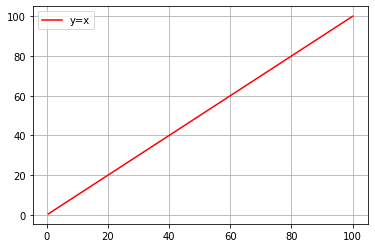

In [ ]:
x = np.linspace(0.5,100,200)
y1 = x
plt.plot(x, y1, '-r', label='y=x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $x^2$, $y$ $=$ $x^3/100$**

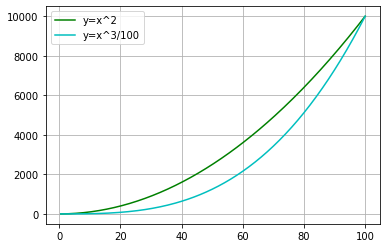

In [ ]:
y2 = x*x
y3 = (x**3)/100
plt.plot(x, y2, '-g', label='y=x^2')
plt.plot(x, y3, '-c', label='y=x^3/100')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $sin(x)$, $y$ $=$ $sin(x)$$/$$x$, $y$ $=$ $log(x)$**

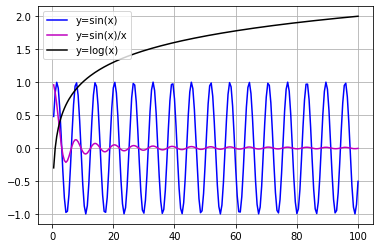

In [ ]:
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log10(x)
plt.plot(x, y4, '-b', label='y=sin(x)')
plt.plot(x, y5, '-m', label='y=sin(x)/x')
plt.plot(x, y6, '-k', label='y=log(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $e^x$**

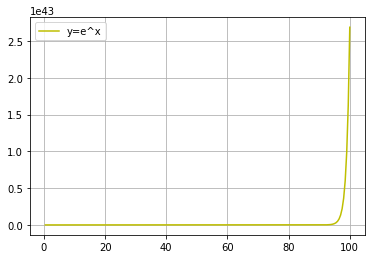

In [ ]:
y7 = np.exp(x)
plt.plot(x, y7, '-y', label='y=e^x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [ ]:
a = []
for i in range(20):
  col = []
  for j in range(5):
    col.append(rm.uniform(1.0,2.0))
  a.append(col)

df = pd.DataFrame(a, columns=['a', 'b', 'c', 'd', 'e'])
print(df)

# separate dataframe containing standard deviations
ar = df.std(axis=0)
print("Column with highest SD: ", ar.idxmax())

#separate dataframe containing means
arra = df.mean(axis=1)
print("Row with lowest mean: ", arra.idxmin())

           a         b         c         d         e
0   1.765161  1.281707  1.110973  1.384773  1.113698
1   1.208857  1.441736  1.700238  1.299173  1.172335
2   1.934196  1.077069  1.832851  1.158925  1.730521
3   1.218908  1.332642  1.898523  1.329670  1.625518
4   1.237138  1.303712  1.799605  1.008568  1.021610
5   1.404454  1.032273  1.942415  1.941120  1.755121
6   1.819296  1.327379  1.467747  1.457106  1.670287
7   1.296171  1.222830  1.365311  1.091662  1.749752
8   1.667483  1.347974  1.235756  1.435453  1.130263
9   1.100380  1.878389  1.395153  1.085191  1.051573
10  1.577245  1.080012  1.500885  1.051797  1.078066
11  1.837544  1.532323  1.875632  1.975884  1.400529
12  1.983235  1.940707  1.630823  1.194797  1.356484
13  1.978267  1.833719  1.879637  1.386262  1.083663
14  1.215664  1.328327  1.398048  1.466244  1.192797
15  1.041578  1.705943  1.392927  1.118827  1.535827
16  1.525373  1.818778  1.593447  1.108136  1.537491
17  1.601743  1.209002  1.299316  1.757345  1.

**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [ ]:
pan = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['f'] = pan

df.loc[df['f'] < 8, 'g'] = 'LT8'
df.loc[df['f'] >= 8, 'g'] = 'GT8'

print(df)

           a         b         c         d         e         f    g
0   1.765161  1.281707  1.110973  1.384773  1.113698  6.656312  LT8
1   1.208857  1.441736  1.700238  1.299173  1.172335  6.822338  LT8
2   1.934196  1.077069  1.832851  1.158925  1.730521  7.733563  LT8
3   1.218908  1.332642  1.898523  1.329670  1.625518  7.405262  LT8
4   1.237138  1.303712  1.799605  1.008568  1.021610  6.370632  LT8
5   1.404454  1.032273  1.942415  1.941120  1.755121  8.075385  GT8
6   1.819296  1.327379  1.467747  1.457106  1.670287  7.741814  LT8
7   1.296171  1.222830  1.365311  1.091662  1.749752  6.725726  LT8
8   1.667483  1.347974  1.235756  1.435453  1.130263  6.816929  LT8
9   1.100380  1.878389  1.395153  1.085191  1.051573  6.510687  LT8
10  1.577245  1.080012  1.500885  1.051797  1.078066  6.288005  LT8
11  1.837544  1.532323  1.875632  1.975884  1.400529  8.621912  GT8
12  1.983235  1.940707  1.630823  1.194797  1.356484  8.106046  GT8
13  1.978267  1.833719  1.879637  1.386262  1.08

**12. Write a small piece of code to explain broadcasting in numpy.**

In [ ]:
a = np.array([[20.0,30.0,40.0],
             [10.0,20.0,30.0]])
b = np.array([1.0,2.0,3.0])

print(a+b)

[[21. 32. 43.]
 [11. 22. 33.]]


a.shape is (2,3) and b.shape is (1,3). b[0, : ] is broadcast to its other row to make the shapes identical for addition. 